In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import re
import sys


In [2]:
def pca_scatter_plot_embedding(covariate):
    # Load training, validation and testing data
    feat_gut_16s_train = pd.read_pickle('./feature_data/{}/train/feat_gut_16s_train.pkl'.format(covariate))
    feat_metabolome_train = pd.read_pickle('./feature_data/{}/train/feat_metabolome_train.pkl'.format(covariate))
    gut_16s_feat_subj_train = pd.read_pickle('./feature_data/{}/train/gut_16s_feat_subj_train.pkl'.format(covariate))
    metabolome_feat_subj_train = pd.read_pickle('./feature_data/{}/train/metabolome_feat_subj_train.pkl'.format(covariate))

    feat_gut_16s_val = pd.read_pickle('./feature_data/{}/val/feat_gut_16s_val.pkl'.format(covariate))
    feat_metabolome_val = pd.read_pickle('./feature_data/{}/val/feat_metabolome_val.pkl'.format(covariate))
    gut_16s_feat_subj_val = pd.read_pickle('./feature_data/{}/val/gut_16s_feat_subj_val.pkl'.format(covariate))
    metabolome_feat_subj_val = pd.read_pickle('./feature_data/{}/val/metabolome_feat_subj_val.pkl'.format(covariate))
    
    feat_gut_16s_test = pd.read_pickle('./feature_data/{}/test/feat_gut_16s_test.pkl'.format(covariate))
    feat_metabolome_test = pd.read_pickle('./feature_data/{}/test/feat_metabolome_test.pkl'.format(covariate))
    gut_16s_feat_subj_test = pd.read_pickle('./feature_data/{}/test/gut_16s_feat_subj_test.pkl'.format(covariate))
    metabolome_feat_subj_test = pd.read_pickle('./feature_data/{}/test/metabolome_feat_subj_test.pkl'.format(covariate))
    
    # PCA
    ## gut_16s
    from sklearn.decomposition import PCA
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    pca_feat_g = make_pipeline(StandardScaler(), PCA())
    pca_feat_g.fit(feat_gut_16s_train)
    pca_feat_gut_16s_train_trans = pca_feat_g.transform(feat_gut_16s_train)
    pca_feat_gut_16s_val_trans = pca_feat_g.transform(feat_gut_16s_val)
    pca_feat_gut_16s_test_trans = pca_feat_g.transform(feat_gut_16s_test)
    
    save_folder = './figures/PCA_MB-SupCon_embedding/{}'.format(covariate)
    
    pc1_pc2_save_folder = './data/PCA_outputs/MB-SupCon/{}'.format(covariate)
    os.makedirs(pc1_pc2_save_folder, exist_ok=True)
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_g_train.txt'), pca_feat_gut_16s_train_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_g_val.txt'), pca_feat_gut_16s_val_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_g_test.txt'), pca_feat_gut_16s_test_trans[:,:2])
    
    ### Scatter plots
    from plotting_utils import scatter_2d_cate
    scatter_2d_cate(gut_16s_feat_subj_train, pca_feat_gut_16s_train_trans, pca_feat_g[1], covariate, 
                'PCA on embeddings\nTraining - gut 16s', save_folder, 
                    '{}_g_train'.format(covariate), fontsize=40)
    scatter_2d_cate(gut_16s_feat_subj_val, pca_feat_gut_16s_val_trans, pca_feat_g[1], covariate, 
               'PCA on embeddings\nValidation - gut 16s', save_folder, 
                    '{}_g_val'.format(covariate), fontsize=40)
    scatter_2d_cate(gut_16s_feat_subj_test, pca_feat_gut_16s_test_trans, pca_feat_g[1], covariate, 
               'PCA on embeddings\nTesting - gut 16s', save_folder, 
                    '{}_g_test'.format(covariate), fontsize=40)
    
    ## metabolome
    from sklearn.decomposition import PCA
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    pca_feat_m = make_pipeline(StandardScaler(), PCA())
    pca_feat_m.fit(feat_metabolome_train)
    pca_feat_metabolome_train_trans = pca_feat_m.transform(feat_metabolome_train)
    pca_feat_metabolome_val_trans = pca_feat_m.transform(feat_metabolome_val)
    pca_feat_metabolome_test_trans = pca_feat_m.transform(feat_metabolome_test)
    
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_m_train.txt'), pca_feat_metabolome_train_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_m_val.txt'), pca_feat_metabolome_val_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_m_test.txt'), pca_feat_metabolome_test_trans[:,:2])
    
    scatter_2d_cate(metabolome_feat_subj_train, pca_feat_metabolome_train_trans, pca_feat_m[1], covariate, 
                'PCA on embeddings\nTraining - metabolome', save_folder, 
                    '{}_m_train'.format(covariate), fontsize=40)
    scatter_2d_cate(metabolome_feat_subj_val, pca_feat_metabolome_val_trans, pca_feat_m[1], covariate, 
                'PCA on embeddings\nValidation - metabolome', save_folder, 
                    '{}_m_val'.format(covariate), fontsize=40)
    scatter_2d_cate(metabolome_feat_subj_test, pca_feat_metabolome_test_trans, pca_feat_m[1], covariate, 
                'PCA on embeddings\nTesting - metabolome', save_folder, 
                    '{}_m_test'.format(covariate), fontsize=40)
    
    return pca_feat_g, (pca_feat_gut_16s_train_trans, pca_feat_gut_16s_val_trans, pca_feat_gut_16s_test_trans), \
        pca_feat_m, (pca_feat_metabolome_train_trans, pca_feat_metabolome_val_trans, pca_feat_metabolome_test_trans)

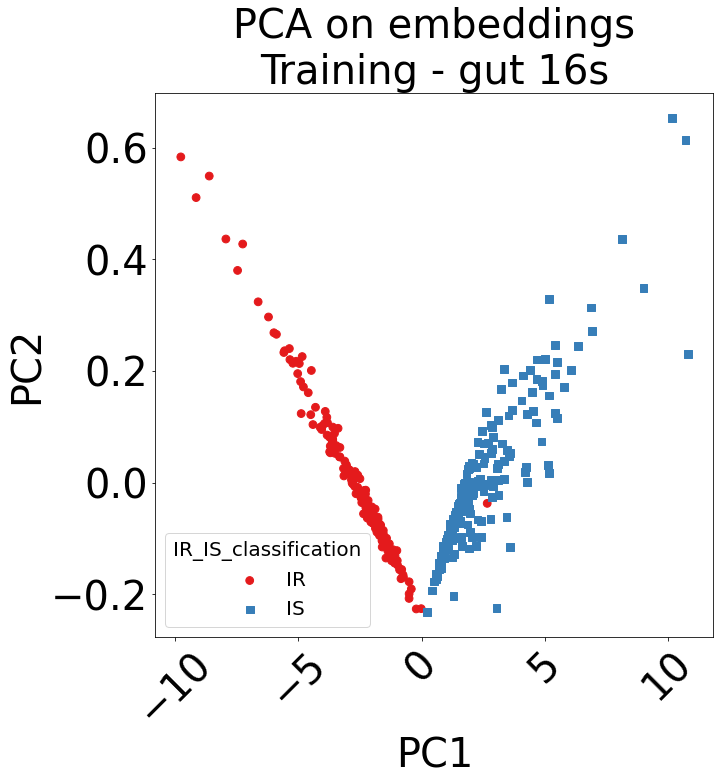

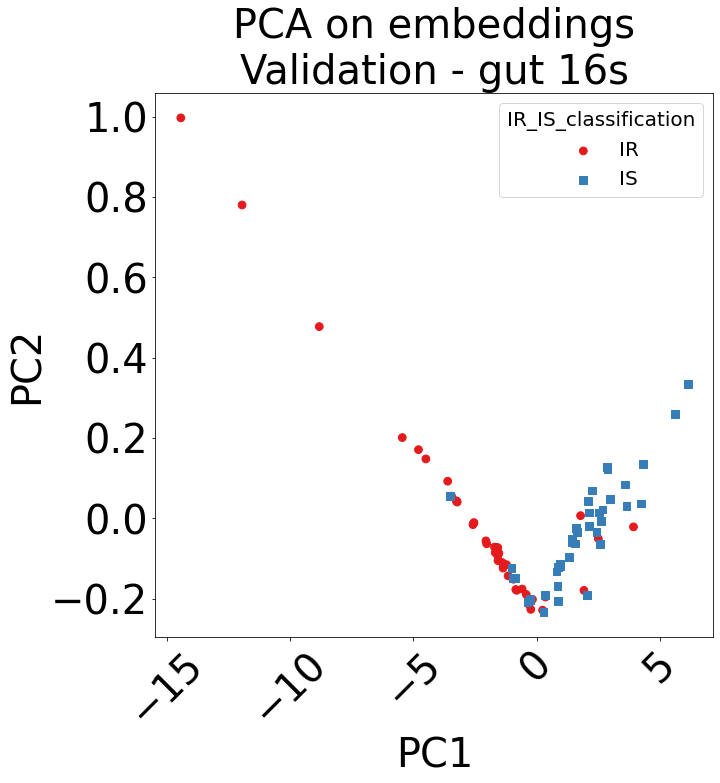

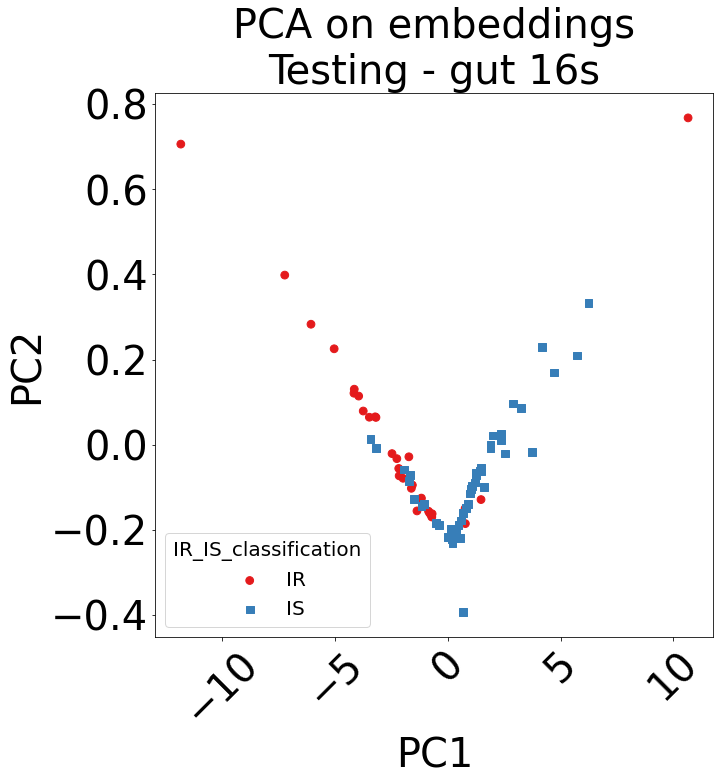

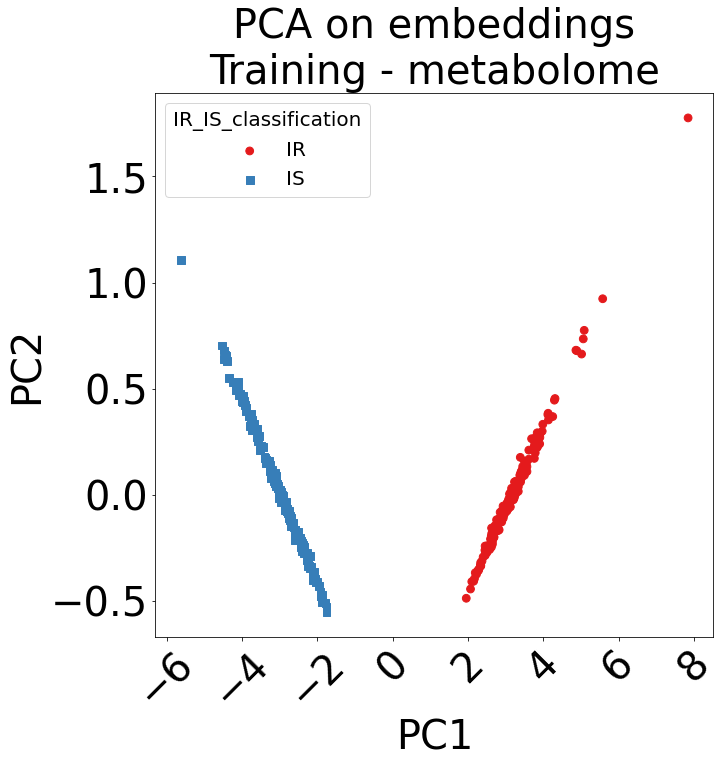

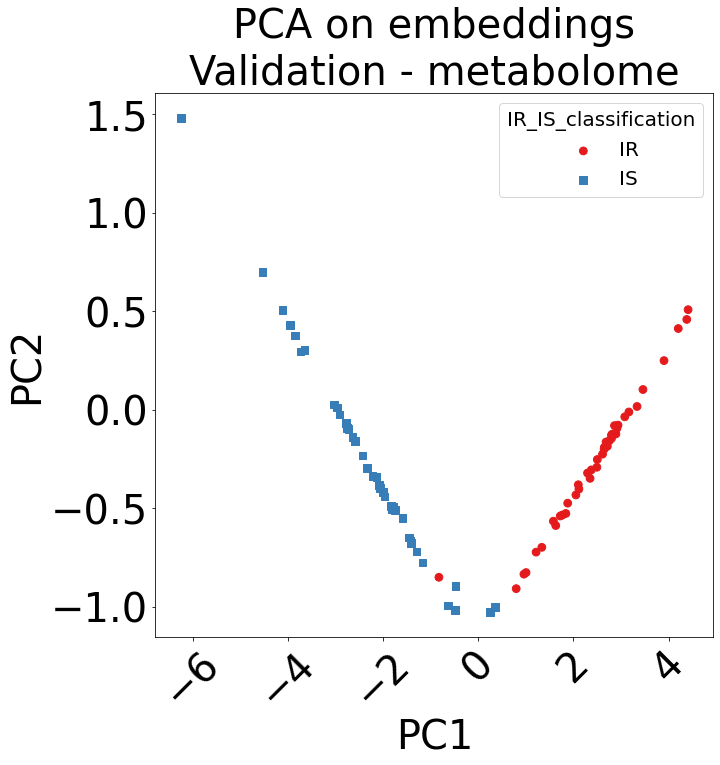

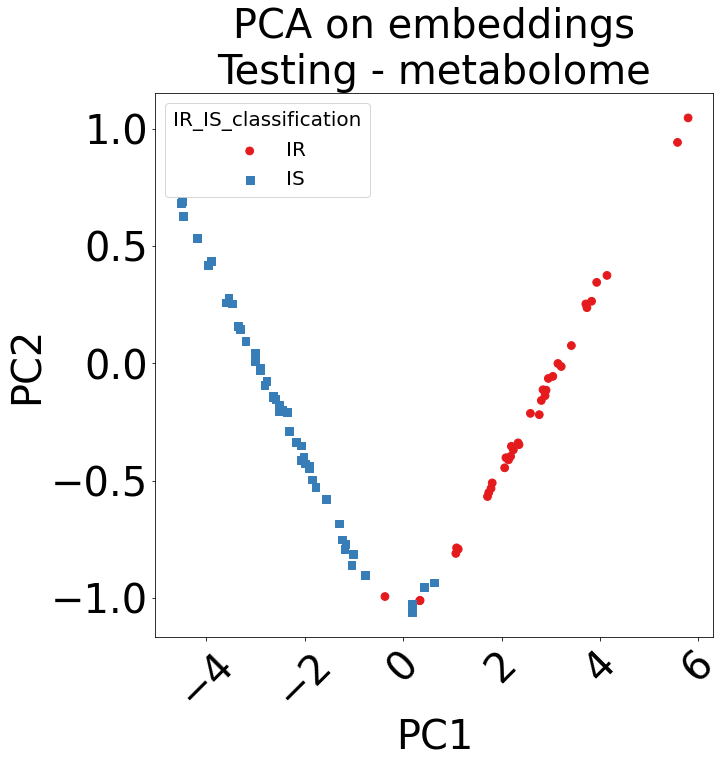

In [3]:
pca_feat_g_iris, pca_feat_g_trans_iris, pca_feat_m_iris, pca_feat_m_trans_iris =\
    pca_scatter_plot_embedding('IR_IS_classification')

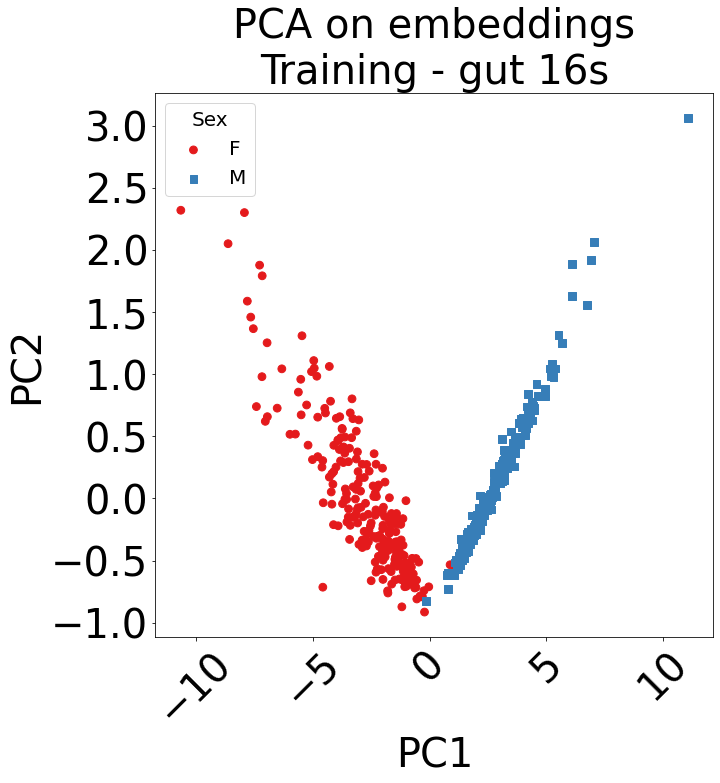

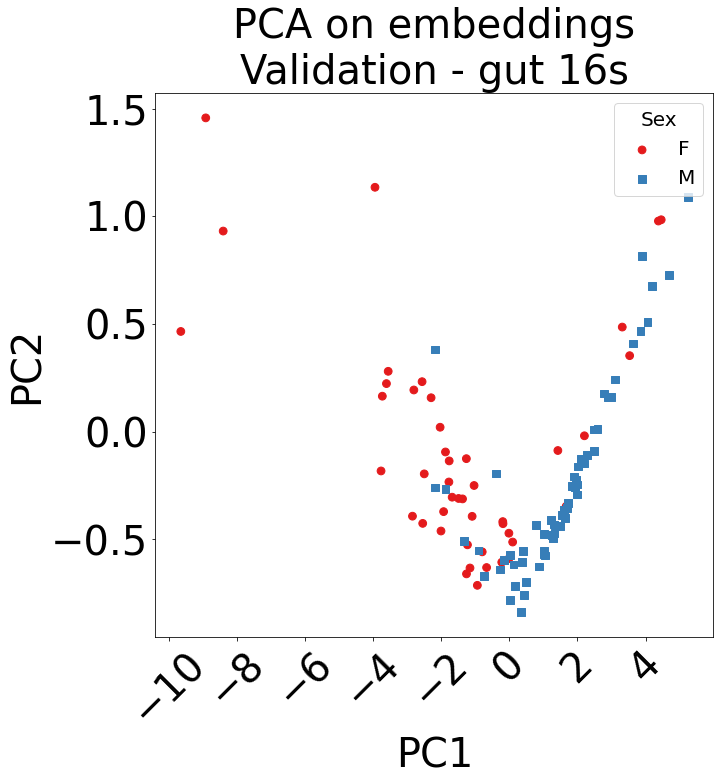

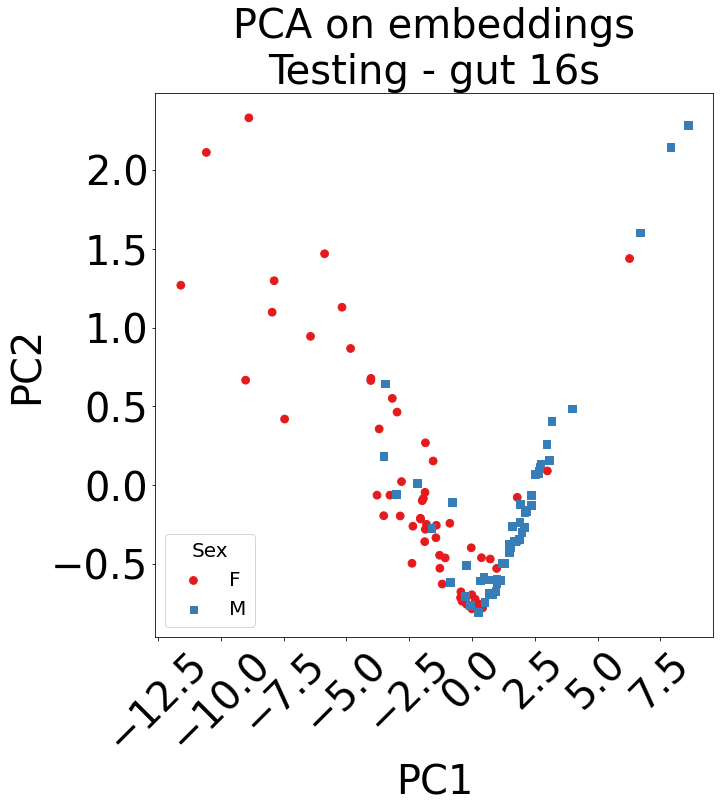

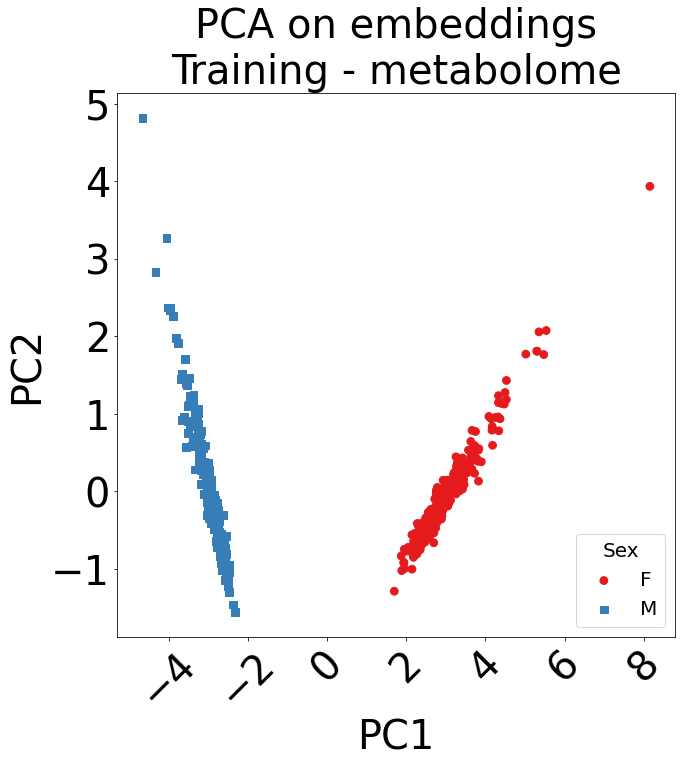

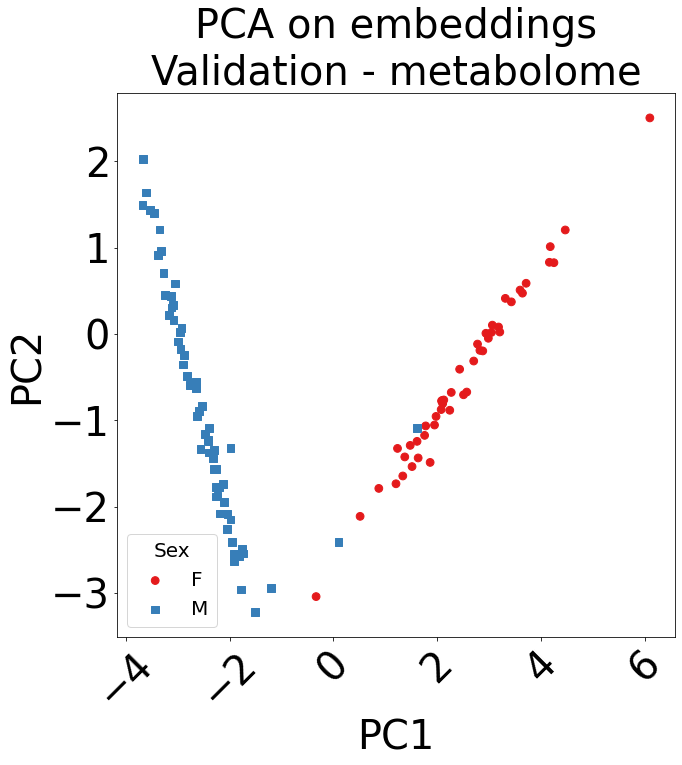

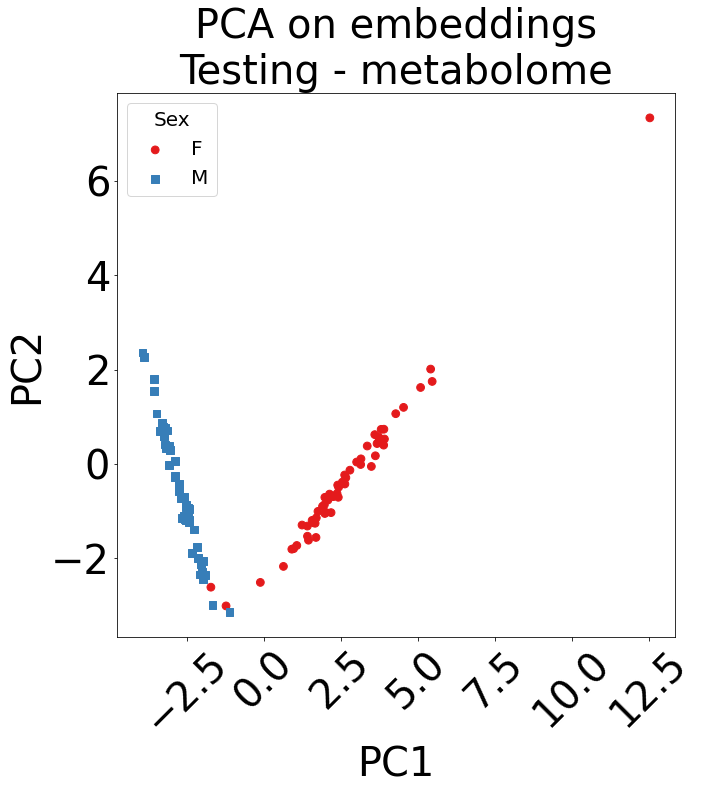

In [4]:
pca_feat_g_sex, pca_feat_g_trans_sex, pca_feat_m_sex, pca_feat_m_trans_sex =\
    pca_scatter_plot_embedding('Sex')

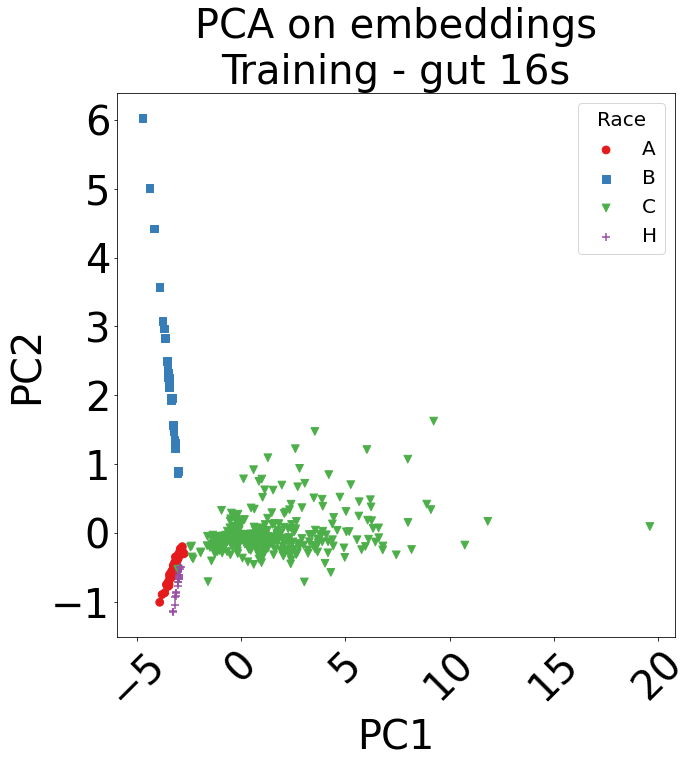

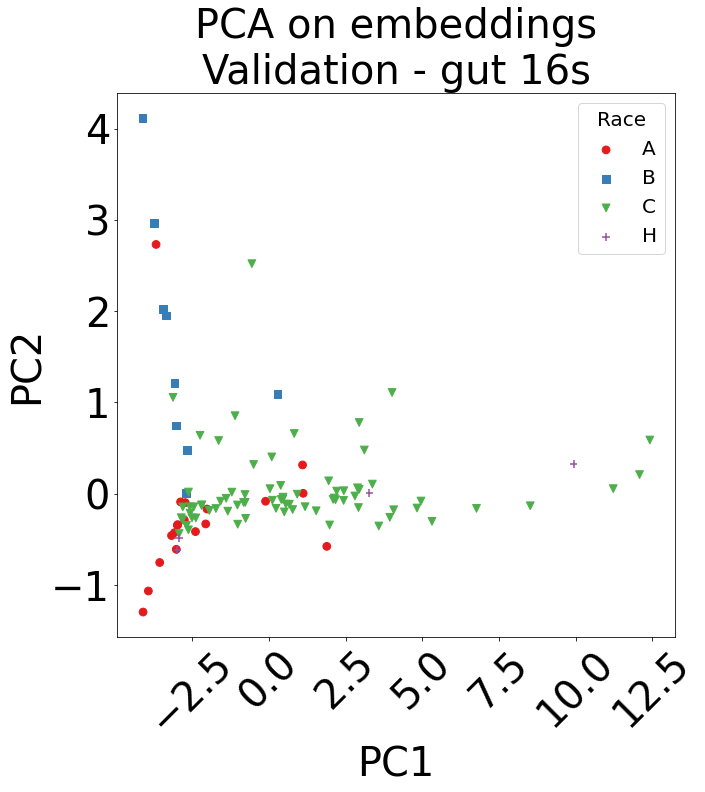

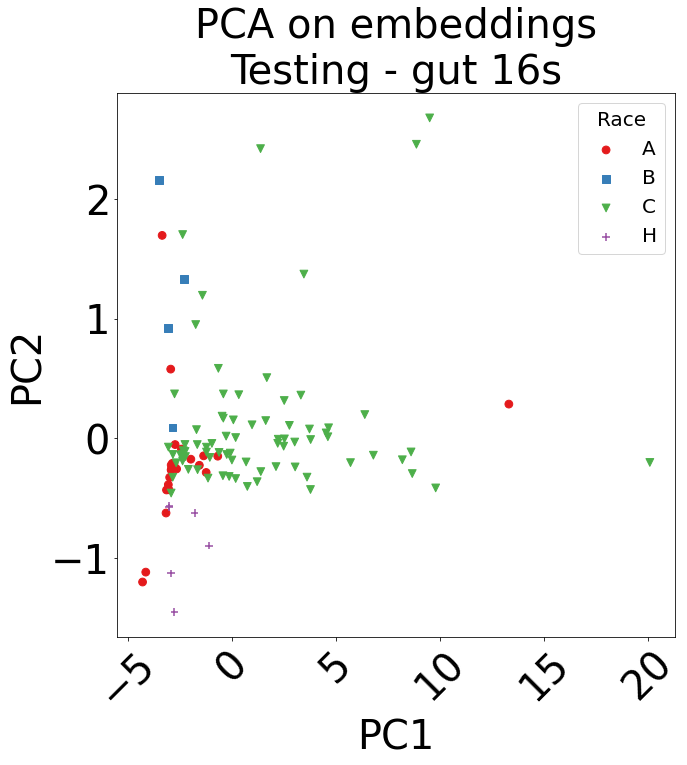

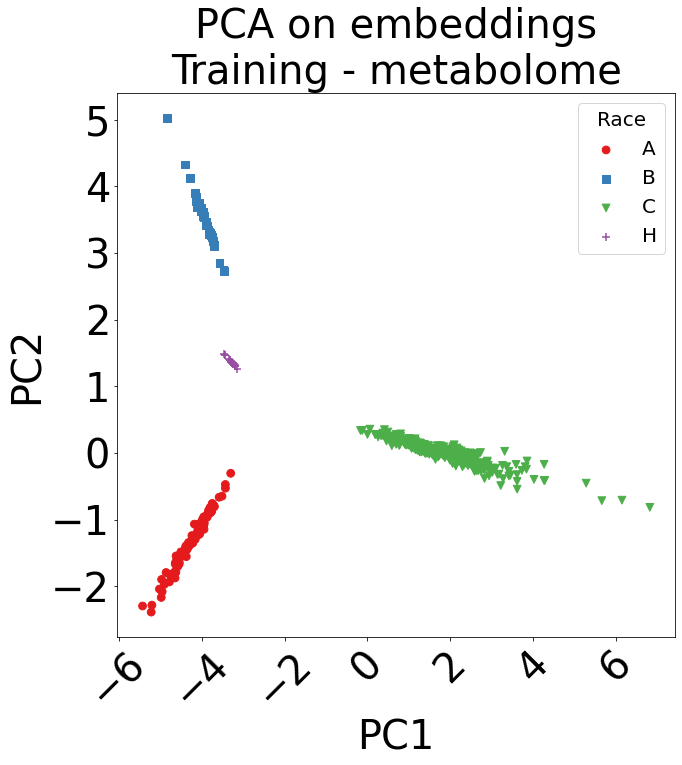

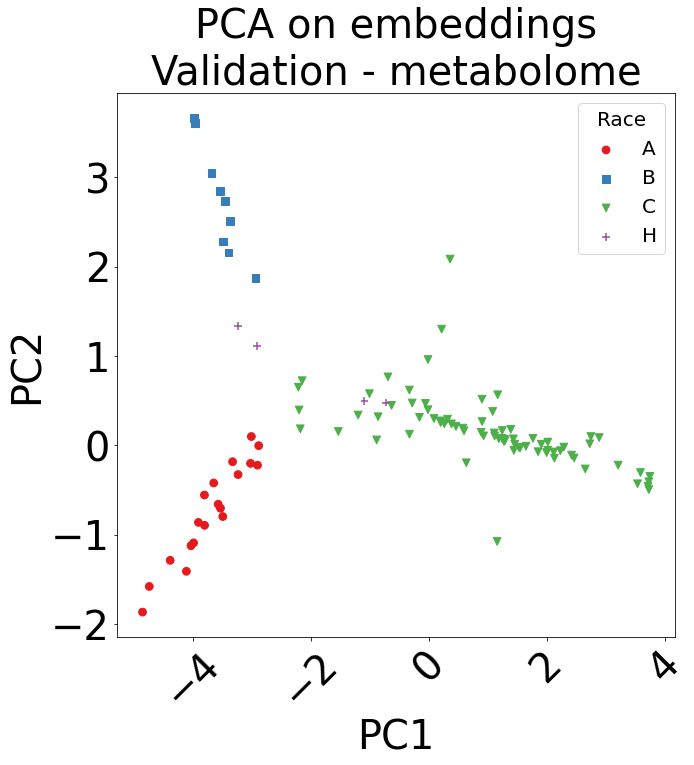

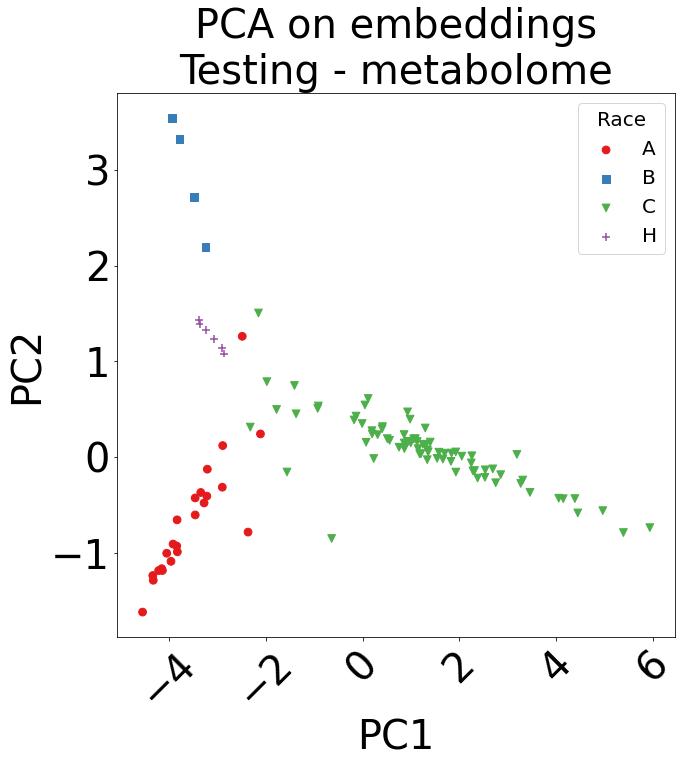

In [5]:
pca_feat_g_race, pca_feat_g_trans_race, pca_feat_m_race, pca_feat_m_trans_race =\
    pca_scatter_plot_embedding('Race')